hola

In [1]:
###import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
# import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
# from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
# from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Import data
1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry 
10. fractal dimension ("coastline approximation" - 1)



In [17]:
# generate a pandas dataframe with the file that contains the dataset
dataset = pd.read_csv(filepath_or_buffer = 'breast-cancer-wisconsin.data', names = ['sample_code','clump_thickness','cell_size','cell_shape', 'marginal_adhesion', 'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'classd'])

# take a look of the data
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))

dataset.head()

The dataset contains 699 observations and 11 features



,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classd
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
# check how many observations we have for each class/species
print('2 = Bening, 4 = Malignant')
dataset.groupby('classd').size()


2 = Bening, 4 = Malignant


classd
2    458
4    241
dtype: int64

In [19]:
# use the five-number analysis to get statiscally explore the dataset
dataset.describe()

,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,classd
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


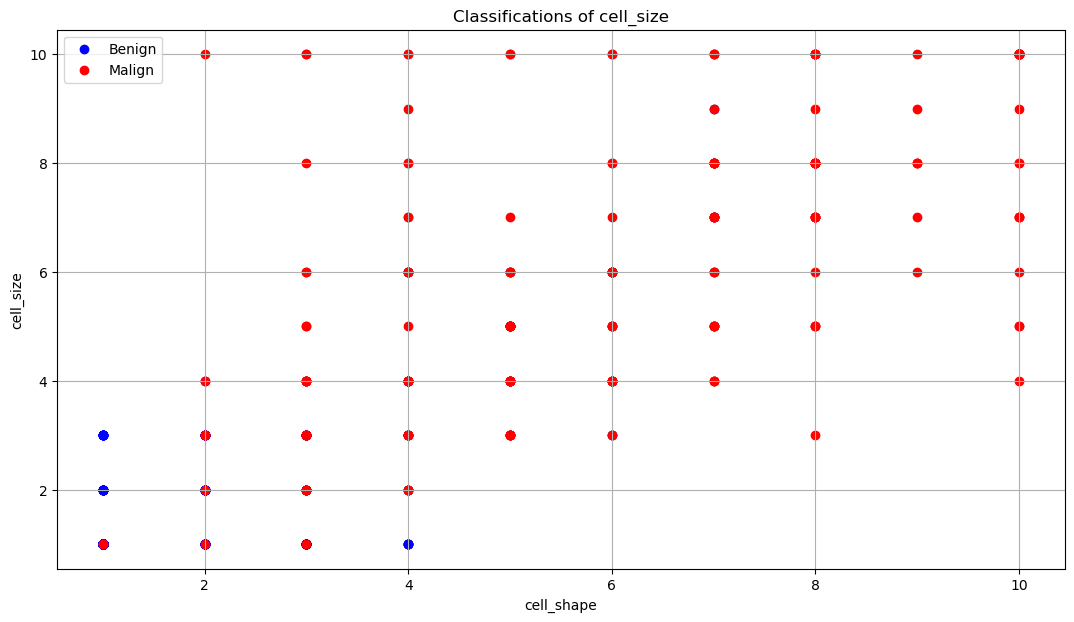

In [31]:
### visualise the dataset
# plot the petal length vs the petal width (a two dimmensional data)

benign = dataset[dataset.classd == 2]
malign = dataset[dataset.classd==4]

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(benign['cell_shape'], benign['cell_size'], label="Benign", facecolor="blue")
ax.scatter(malign['cell_shape'], malign['cell_size'], label="Malign", facecolor="red")


ax.set_xlabel("cell_shape")
ax.set_ylabel("cell_size")
ax.grid()
ax.set_title("Classifications of cell_size")
ax.legend()

In [32]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('classd', axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]

# y will be our dataset with the feature of interest
y = dataset['classd']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [33]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sample_code          61634
clump_thickness          1
cell_size                1
cell_shape               1
marginal_adhesion        1
epithelial_size          1
bare_nuclei              1
bland_chromatin          1
normal_nucleoli          1
mitoses                  1
classd                   2
dtype: object
Max values of the dataset are: 
sample_code          13454352
clump_thickness            10
cell_size                  10
cell_shape                 10
marginal_adhesion          10
epithelial_size            10
bare_nuclei                 ?
bland_chromatin            10
normal_nucleoli            10
mitoses                    10
classd                      4
dtype: object
Min values of the scaled dataset are: 
-0.7449149782167317
Max values of the scaled dataset are: 
2.320275080096454


In [34]:
mlp_clf = MLPClassifier(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(2),
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

## Training

In [36]:
# training the model
mlp_clf.fit(X_train_scaled, y_train)

/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=2, max_iter=300)

## Testing

In [37]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2,

## Evaluation


In [38]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   please be aware of the metrics we have and what we can use
#   the f1-score is for binary targets
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           2       0.78      0.99      0.88       226
           4       0.97      0.50      0.66       124

    accuracy                           0.82       350
   macro avg       0.88      0.75      0.77       350
weighted avg       0.85      0.82      0.80       350



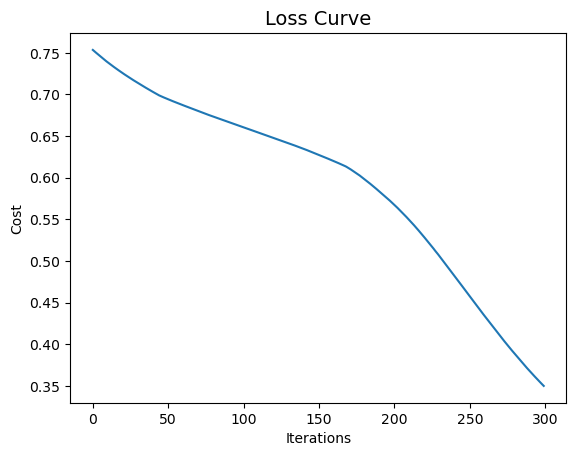

In [39]:
# see how well was the training of the model
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

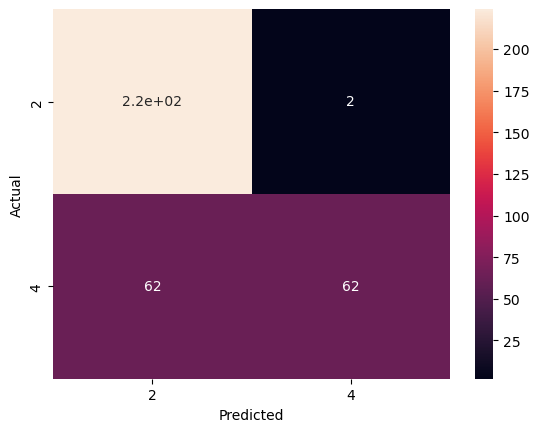

In [40]:
### see how well was the testing of the model

# generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [41]:
# take a look at the predictions
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# take a look at the true examples
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
                0
count  350.000000
mean     2.365714
std      0.774206
min      2.000000
25%      2.000000
50%      2.000000
75%      2.000000
max      4.000000

Groundtruth 
count    350.000000
mean       2.708571
std        0.957962
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: classd, dtype: float64


## hyper parameter tuning

In [42]:
# we can define a set of parameters that we are interested to train with our 
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), (100)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Strength of the L2 regularization term
    # “Regularization is any modification we make to a learning algorithm that 
    #   is intended to reduce its generalization error but not its training 
    #   error.” — Ian Goodfellow
    'alpha': [0.0001, 0.05],
    # a value that works as the temperature in the simulated annealing algorithm
    #   but for the stochastic gradient descent algorithm
    'learning_rate': ['constant','adaptive'],
}

In [43]:
grid = GridSearchCV(
    # the structure of the model we are interest in
    mlp_clf,
    # the different hyper parameters we want to train
    param_grid,
    # use paralelisation. -1 = use all processors
    n_jobs = -1,
    # number of folds use in cross-validation approach
    cv = 5
    )

In [44]:
# execute the hyper parameter tuning
#   this process can take a while
grid.fit(X_train_scaled, y_train)

/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=2, max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [45]:
# get the best values for each hyper parameter tuned
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


In [46]:
# save the results as pandas dataframe to easily interact with the data
grid_results = pd.DataFrame(grid.cv_results_)

In [47]:
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.377276,0.134349,0.001105,0.000777,tanh,0.0001,"(150, 100, 50)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.957143,0.914286,0.942029,0.948406,0.019430,1
39,0.484851,0.194924,0.000731,0.000133,tanh,0.05,"(150, 100, 50)",constant,100,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.971429,0.957143,0.957143,0.914286,0.942029,0.948406,0.019430,1
91,0.160642,0.064000,0.000426,0.000109,relu,0.0001,"(120, 80)",adaptive,50,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,3
107,0.114516,0.007078,0.000670,0.000730,relu,0.0001,100,adaptive,150,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,3
105,0.093187,0.018769,0.000339,0.000132,relu,0.0001,100,adaptive,100,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.441507,0.035239,0.000571,0.000145,relu,0.05,"(150, 100, 50)",constant,100,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.928571,0.928571,0.814286,0.871429,0.942029,0.896977,0.047993,140
114,0.207127,0.015071,0.000698,0.000408,relu,0.05,"(150, 100, 50)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.928571,0.857143,0.871429,0.871429,0.942029,0.894120,0.034291,141
108,0.238016,0.017339,0.000514,0.000053,relu,0.05,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.957143,0.857143,0.828571,0.871429,0.942029,0.891263,0.049810,142
72,0.208773,0.015065,0.000478,0.000021,relu,0.0001,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.928571,0.857143,0.842857,0.885714,0.942029,0.891263,0.038748,142


In [48]:
# here we generate a straight forward coder
def coder(classd):
    if classd == 2:
        return 0
    elif classd == 4:
        return 1

# applying the coder to the feature of interest
dataset['classd'] = dataset['classd'].apply(coder)

In [49]:
dataset.groupby('classd').size()

classd
0    458
1    241
dtype: int64

## Genrating the training and testing data sets

In [51]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('classd', axis=1)

# converting into numpy array and assigning sepal length and sepal width
X = X.to_numpy()[:, (0,1)]

# y will be our dataset with the feature of interest
y = dataset['classd']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [52]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to 
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
sample_code          61634
clump_thickness          1
cell_size                1
cell_shape               1
marginal_adhesion        1
epithelial_size          1
bare_nuclei              1
bland_chromatin          1
normal_nucleoli          1
mitoses                  1
classd                   0
dtype: object
Max values of the dataset are: 
sample_code          13454352
clump_thickness            10
cell_size                  10
cell_shape                 10
marginal_adhesion          10
epithelial_size            10
bare_nuclei                 ?
bland_chromatin            10
normal_nucleoli            10
mitoses                    10
classd                      1
dtype: object
Min values of the scaled dataset are: 
-2.103596290099254
Max values of the scaled dataset are: 
14.80786379859976


### Regression Model

In [53]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(2),
    # maximum number of iterations for the solver
    max_iter = 300,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by 
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

In [54]:
# training the model
mlp_reg.fit(X_train_scaled, y_train)

/Users/saramiranda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, max_iter=300)

In [55]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([-0.53093817, -0.53039603, -0.55581358, -0.54666695, -1.00346715,
       -0.53039603, -0.53039603, -1.19035636, -0.33372277, -0.88367156,
       -0.53039603, -0.14605932, -0.53039603, -0.59936125, -0.53039603,
        1.42622021, -0.67644369,  0.58174179, -0.54503954, -0.53039603,
       -0.77786272, -1.02617241, -0.53039603, -1.17124398, -0.93114912,
       -0.97894821, -0.53039603,  1.19284396, -1.57969802,  0.14344598,
       -0.55142755, -0.53039603, -0.55311363, -0.33284806, -0.53039603,
       -0.53039603, -0.53039603,  1.00548614, -0.53039603, -0.55893791,
       -0.53039603, -0.60076658,  0.79675259, -1.03528231, -0.53039603,
       -0.53039603, -0.53039603, -0.88896827, -0.59298179, -0.54441356,
       -0.91247406, -0.56878077, -0.53039603, -0.69116559, -0.41685427,
       -0.53039603, -0.53039603,  0.52034793, -0.54952485, -0.53039603,
       -0.65785655, -1.30484978,  0.61032876, -0.6066349 , -0.85852941,
       -0.53039603,  0.54820218,  1.1939398 , -0.5577625 , -0.53

In [56]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# r2
#   Best possible score is 1.0 and it can be negative 
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

r2: -3.44
mse: 1.02
explained variance: -0.65


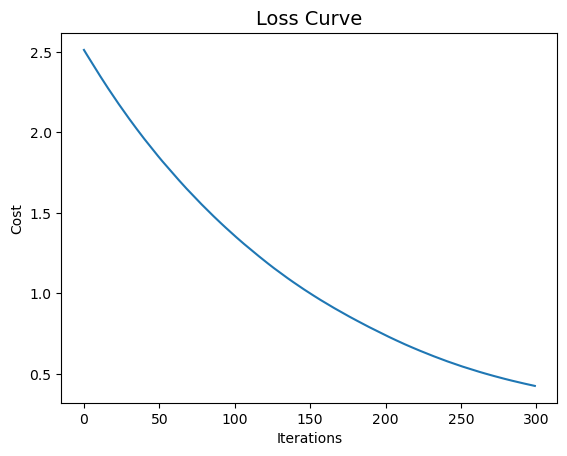

In [57]:
# see how well was the training of the model
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [59]:
### see how well was the testing of the model

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)

ValueError: If using all scalar values, you must pass an index